## 군집화(클러스터링, Clustering)

주어진 데이터 집합을 유사한 데이터들의 그룹으로 나누는 것을 군집화(클러스터링, clustering)이라고 하고 이렇게 나누어진 **유사한 데이터의 그룹**을 **클러스터(cluster)**라 한다.

클러스터링은 학습을 위한 훈련자료를 필요로 하지 않는 **비지도학습(unsupervised learning)**의 일종이다.

### 지도 학습 vs. 비지도 학습

#### 지도(교사/감독) 학습 (supervised learning) - {$x, \omega$}
관측된 자료가 특징 벡터 $x$ 와 관측 값이 속해있는 클래스 $\omega$ 로 이루어진 변수 쌍 {$x, \omega$} 으로 구성될 경우의 학습은 특징벡터와 정확한 답이 주어졌기 때문에 지도(교사/감독)(supervised) 학습이라고 한다.
* 모수적 (parametric) 또는
* 비모수적 (non-parametric) 방법을 

통해서 **각 클래스의 확률밀도를 추정하여 분류기에 사용**한다.

#### 비지도(비교사/무감독) 학습 (unsupervised learning) - {$x$}
클래스 라벨 $\omega$ 가 주어지지 않고, 특징 벡터 $x=\{x_1, x_2,...,x_N\}$ 만으로 이루어진 데이터 집합이 주어질 경우의 학습은 정확한 답은 제공 받지 못하므로 비지도(비교사/무감독) (unsupervised) 학습이라고 한다.
* 모수적 방법
* 비모수적 방법

#### 비교사 학습이 유용한 경우
1. 데이터 마이닝과 같이 원천적으로 데이터에 대한 클래스 라벨들이 주어지지 않을 경우 
2. 많은 데이터 집합들이 작은 프로토타입(원형) 집합으로 압축되어 질 수 있는 경우 
3. 표본의 수가 너무 많아서 각 표본마다 일일이 라벨링하는 것이 비용이 많이 드는 지루한 과정일 경우

### 비지도학습의 두가지 접근법

1. **모수적 (parametric) 방법 (혼합 모델 구축을 통한 방법)** - 이 방법은 여러 개의 모수적 확률밀도함수(주로 가우시안)를 혼합하여 주어진 확률밀도함수를 모델링하는 방법으로 아래 식과 같이 모델링 되며, 모델 파라미터를 찾는 것이 목적이다. 이 방법을 “**모수적 혼합 모델(parametric mixture models)***”이라고 한다. 대표적인 방법: 가우시안 혼합모델(GMM: Gaussian Mixture Model) 방법

$$ P(x|\theta) = \sum_{i=1}^C P(x_i|\omega_i, \theta_i) P(\omega_i)$$

<img src="images/GMM.png" width="250px" height="150px" >

<img src="https://blogs.sas.com/content/iml/files/2020/07/EMalg4.png" width=300>

2. **비모수적 (non-parametric) 방법**
이 방법은 주어진 데이터에 대한 어떠한 가정도 하지 않고 정해진 수의 클러스터들로 데이터를 나누는 방법으로 군집화 (클러스터링)라고 한다. 이 방법은 파라미터 최우추정(MLE)과 밀접하게 관련되어 있다. 대표적인 방법:  K-means 알고리즘

<img src="https://d2908q01vomqb2.cloudfront.net/f1f836cb4ea6efb2a0b1b99f41ad8b103eff4b59/2018/11/02/k-means-sagemaker-1.gif" width=250 >

### K-means 클러스터링 알고리즘

K-Means 클러스터링 알고리즘은 가장 단순하고 빠른 클러스터링 알고리즘의 하나이다. K 개의 중심(centroid)들을 결정하고, 각 데이터 점들을 가장 근접한 중심으로 군집화(clustering) 하는 알고리즘이다. 이를 위해서 다음과 같은 **목적함수 값이 최소화될 때까지 클러스터의 중심(centroid) 위치와 각 데이터가 소속될 클러스터를 반복해서 찾는다**. 

$$ J = \sum_{k=1}^K \sum_{i \in C_k} d(x_i, \mu_k)  $$

이 식에서 
* $K$는 클러스터의 갯수이고  
* $C_k$는 $k$번째 클러스터에 속하는 데이터의 집합,  
* $\mu_k$는 $k$번째 클러스터의 중심위치,  
* $d$는 $x_i$ 와 $\mu_k$ 두 데이터 사이의 거리(distance) 혹은 비유사도(dissimilarity)로 정의한다. 

만약 유클리드 거리를 사용한다면 다음과 같다.

$$ d(x_i, \mu_k) = || x_i - \mu_k ||^2 $$

세부 알고리즘은 다음과 같다.

1. **임의의 중심값 $\mu_k$ 를 고른다**. 보통 데이터 샘플 중에서 $K$개를 임의로 선택한다.
2. **중심에서 각 데이터까지의 거리를 계산**
3. 각 데이터에서 **가장 가까운 중심을 선택하여 클러스터 갱신**
4. 다시 만들어진 **클러스터에 대해 중심을 다시 계산**하고 1 ~ 4를 반복한다.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/Kmeans_animation_withoutWatermark.gif/330px-Kmeans_animation_withoutWatermark.gif" width="300">

scikit-learn의 cluster 서브패키지는 K-means 클러스터링을 위한 `KMeans` 클래스를 제공한다. 다음과 같은 인수를 받을 수 있다.

* `n_clusters`: 클러스터의 갯수
* `init`: 초기화 방법. `"random"`이면 무작위, `"k-means++"`이면 K-Means++ 방법. 또는 각 데이터의 클러스터 라벨. 
* `n_init`: 초기 중심값 시도 횟수. 디폴트는 10이고 10개의 무작위 중심값 목록 중 가장 좋은 값을 선택한다.
* `max_iter`: 최대 반복 횟수.
* `random_state`: 시드값.

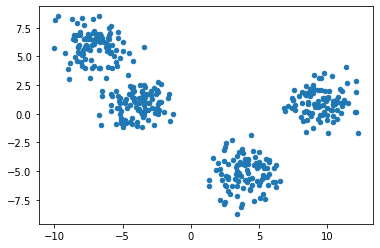

In [13]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

X, y_true = make_blobs(n_samples=400, centers=4, n_features=2, cluster_std=1.2)
plt.scatter(X[:,0], X[:,1], s=20)

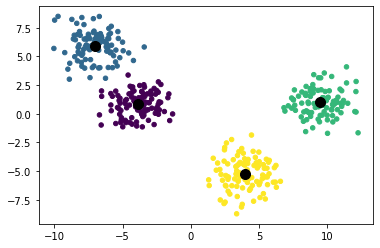

In [14]:
from sklearn.cluster import KMeans
# create kmeans object
kmeans = KMeans(n_clusters=4, init="random")  
# fit kmeans object to data
kmeans.fit(X)
# print location of clusters learned by kmeans object
centers = kmeans.cluster_centers_
# save new clusters for chart
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=20, cmap='viridis')
plt.scatter(centers[:,0],centers[:,1], c='black', s=100)

## K-Means++ 

K-Means 클러스터링은 초기 값을 어떻게 선택 하는가에 성능이 따라 크게 달라지는 성질을 가지고 있다. 이러한 성질로 인한 피해를 줄이기 위해 K-Means++ 알고리즘은 **초기 중심값을 보다 적절히 설정**하기 위한 알고리즘이다. 다음과 같은 방법을 통해 되도록 멀리 떨어진 중심값 집합을 찾아낸다.

1. 데이터 집합으로부터 임의의 데이터를 하나 선택하여 **첫 번째 중심으로 설정**한다.


2. **K개의 중심이 선택될 때 까지** 다음의 단계를 반복한다.
   * 데이터 집합의 각 데이터에 대해서, 해당 데이터와 선택된 중심점들 중 가장 가까운 **중심과의 거리 $D(x)$를 계산**한다.
   * 확률이 **$D(x)^2$에 비례하는 편중 확률 분포를 사용**하여 임의의 데이터를 선택한 후, **다음 중심으로 설정**한다.


3. 선택된 K개의 중심들을 초기 값으로 하여 **K-Means 클러스터링을 수행**한다.

K-Means++ 알고리즘은 초기 값을 설정하기 위해 추가적인 시간을 필요로 하지만, 이후 선택된 초기 값은 이후 K-Means 알고리즘이 ${\displaystyle O(\log k)}$의 시간 동안 최적 K-Means 해를 찾는 것을 보장한다.

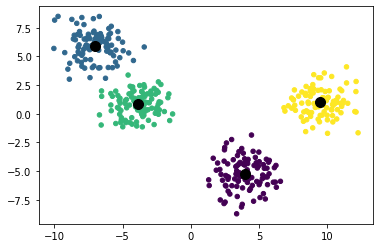

In [15]:
kmeans = KMeans(n_clusters=4, init="k-means++") # KMeans() 의 init 인수의 default 값이 k-means++ 이다
kmeans.fit(X)
centers = kmeans.cluster_centers_
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=20, cmap='viridis')
plt.scatter(centers[:,0],centers[:,1], c='black', s=100)

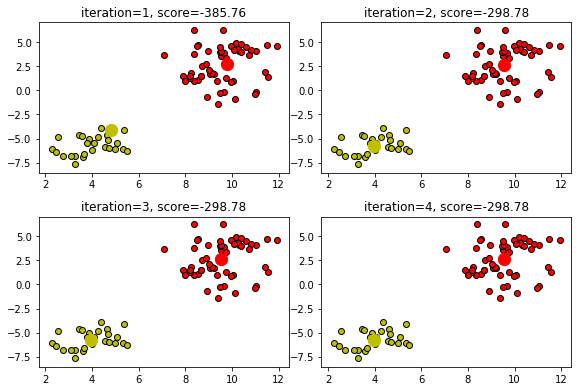

In [19]:
X, _ = make_blobs(n_samples=80, random_state=4)

def plot_KMeans(n):
    model = KMeans(n_clusters=2, init="random", n_init=1, max_iter=n, random_state=0).fit(X)
    c0, c1 = model.cluster_centers_
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], facecolor='r', edgecolors='k')
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], facecolor='y', edgecolors='k')
    plt.scatter(c0[0], c0[1], c="r", s=150)
    plt.scatter(c1[0], c1[1], c="y", s=150)
    plt.grid(False)
    plt.title("iteration={}, score={:5.2f}".format(n, model.score(X)))

plt.figure(figsize=(8, 8))
plt.subplot(321)
plot_KMeans(1)
plt.subplot(322)
plot_KMeans(2)
plt.subplot(323)
plot_KMeans(3)
plt.subplot(324)
plot_KMeans(4)
plt.tight_layout()
plt.show()

## DBSCAN 클러스터링

K-Means 클러스터링 방법은 단순하고 강력한 방법이지만 **클러스터의 모양이 원형이 아닌 경우**에는 잘 동작하지 않으며 **클러스터의 갯수를 사용자가 지정**해주어야 한다는 단점이 있다.

DBSCAN(Density-Based Spatial Clustering of Applications with Noise) 방법은 데이터가 밀집한 정도 즉 밀도를 이용하여 **클러스터의 형태에 구애받지 않으며,** **클러스터의 갯수를 사용자가 지정할 필요가 없다**. DBSCAN 방법에서는 초기 데이터로부터 근접한 데이터를 찾아나가는 방법으로 클러스터를 확장한다. 이 때 다음 사용자 인수를 사용한다.

* **epsilon $\varepsilon$**: 이웃(neighborhood)을 정의하기 위한 거리
* **최소 데이터 갯수(minimum points)**: 밀집지역을 정의하기 위해 필요한 이웃의 갯수

만약 $\varepsilon$ 거리 안의 이웃 영역 안에 최소 데이터 갯수 이상의 데이터가 있으면 그 데이터는 **핵심(core) 데이터**이다. 이렇게 핵심 데이터를 찾아낸 다음에는 이 핵심 데이터의 이웃영역 안에 있는 데이터를 이 핵심데이터와 연결된(reached) **고밀도 데이터**로 정의한다. 고밀도 데이터의 이웃영역 안에 있는 데이터도 마찬가지로 연결된 고밀도 데이터가 된다. 만약 고밀도 데이터에 더 이상 이웃이 없으면 이 데이터는 **경계(border) 데이터**라고 하며 연결은 끝난다. 핵심 데이터도 아니고 경계 데이터도 아닌 데이터를 **outlier**라고 한다.

<img src="https://i.stack.imgur.com/5aikc.png" width=250 >

scikit-learn의 cluster 서브패키지는 DBSCAN 클러스터링을 위한 `DBSCAN` 클래스를 제공한다. 다음과 같은 인수를 받을 수 있다.

* `eps`: 이웃을 정의하기 위한 거리 $\varepsilon$.
* `min_samples`: 핵심 데이터를 정의하기 위해 필요한 이웃영역안의 데이터 갯수.

클러스터링이 끝나면 다음 속성을 가진다.

* `labels_`: 클러스터 번호
* `core_sample_indices_`: 핵심 데이터의 인덱스

다음은 `make_circles` 명령과 `make_moons` 명령으로 만든 동심원, 초승달 데이터를 DBSCAN 방법으로 클러스터링한 결과를 나타낸 것이다. 마커(marker)의 모양은 클러스터를 나타내고 마커의 크기가 큰 데이터는 핵심데이터, x 표시된 데이터는 outlier이다.

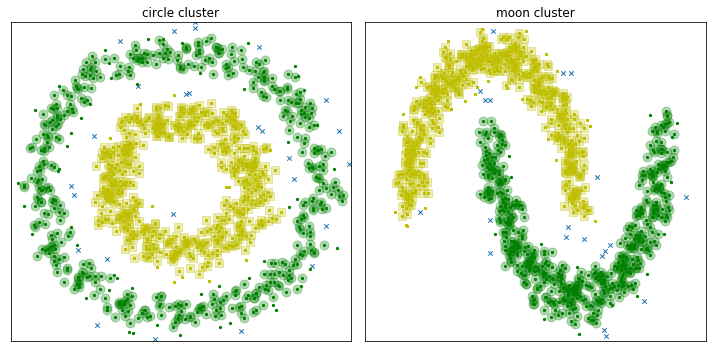

In [20]:
import numpy as np
from sklearn.datasets import make_circles, make_moons
from sklearn.cluster import DBSCAN

n_samples = 1000
np.random.seed(2)
X1, y1 = make_circles(n_samples=n_samples, factor=.5, noise=.09)
X2, y2 = make_moons(n_samples=n_samples, noise=.1)

def plot_DBSCAN(title, X, eps, xlim, ylim):
    model = DBSCAN(eps=eps)
    y_pred = model.fit_predict(X)
    idx_outlier = np.logical_not((model.labels_ == 0) | (model.labels_ == 1))
    plt.scatter(X[idx_outlier, 0], X[idx_outlier, 1], marker='x', lw=1, s=20)
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], marker='o', facecolor='g', s=5)
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], marker='s', facecolor='y', s=5)
    X_core = X[model.core_sample_indices_, :]
    idx_core_0 = np.array(list(set(np.where(model.labels_ == 0)[0]).intersection(model.core_sample_indices_)))
    idx_core_1 = np.array(list(set(np.where(model.labels_ == 1)[0]).intersection(model.core_sample_indices_)))
    plt.scatter(X[idx_core_0, 0], X[idx_core_0, 1], marker='o', facecolor='g', s=80, alpha=0.3)
    plt.scatter(X[idx_core_1, 0], X[idx_core_1, 1], marker='s', facecolor='y', s=80, alpha=0.3)
    plt.grid(False)
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    return y_pred

plt.figure(figsize=(10, 5))
plt.subplot(121)
y_pred1 = plot_DBSCAN("circle cluster", X1, 0.1, (-1.2, 1.2), (-1.2, 1.2))
plt.subplot(122)
y_pred2 = plot_DBSCAN("moon cluster", X2, 0.1, (-1.5, 2.5), (-0.8, 1.2))
plt.tight_layout()
plt.show()

### hard clustering vs. soft clustering

K-means 알고리즘의 중요한 특징 중 하나는 **하드 클러스터링(hard clustering) 방법**이라는 점입니다. 즉, **각 포인트를 하나의 클러스터에만 연결**합니다. 이 접근 방식의 한계는 데이터 포인트가 특정 클러스터와 얼마나 관련되어 있는지 알려주는 **불확실성 측정 또는 확률이 없다는 것**입니다. 그렇다면 하드 클러스터링 대신 소프트 클러스터링(soft clustering)을 사용하는 것은 어떨까요? 이것이 바로 가우시안 혼합 모델(Gaussian Mixture Model: GMM)이 시도하는 것입니다. 

## 가우시안 혼합모델 (Gaussian Mixture Model : GMM)

가우시안 혼합은 여러 가우시안들이 혼합되어 만들어진 함수를 말하며, 각각의 가우시안들은 
$  k \in \{1, \cdots, K\}$ 로 구분되며, 
여기에서 $K$ 는 주어진 자료에서의 클러스터 개수를 말한다. 
혼합의 각 가우시안 $k$ 는 다음의 파라미터로 구성됩니다.
* **중심을 정의하는 평균 $μ$**.
* **폭을 정의하는 공분산 $Σ$**. 이것은 다변량 가우시안에서 타원체의 치수와 같습니다.
* 가우스 함수의 크기를 결정하는 **혼합 확률 $π$**  

이러한 파라메타들을 그래픽으로 설명하면 다음과 같다.

<img src="https://miro.medium.com/max/770/1*lTv7e4Cdlp738X_WFZyZHA.png" width="300">

여기에서, 우리는 세 개의, 즉 $K=3$, 가우시안 함수가 있음을 알 수 있습니다. 
각 가우시안은 주어진 세 개의 클러스터 각각에 포함된 자료들을 설명합니다. 
**혼합 계수들(mixing coefficients)**은 그들의 확률이며, 다음의 조건을 충족해야 한다. 

$$ \sum_{k=1}^K \pi_k = 1$$

이제 이러한 파라메타에 대한 최적의 값을 어떻게 결정합니까? 
이를 위해서는 각 가우시안이 각 클러스터에 속하는 데이터 포인트에 맞는지 확인해야 합니다. 
이것이 바로 최대 우도(Maximum Likelihood)가 하는 것입니다.

일반적으로 가우시안 밀도함수는 다음과 같이 주어집니다.

$$\mathcal{N}(\mathbf{x}\mid \mu, \Sigma) = { 1 \over (2\pi)^{D/2} |\Sigma|^{1/2} } \exp \left( - {1 \over 2} (\mathbf{x}-\mu)^T\Sigma^{-1}(\mathbf{x}-\mu) \right) $$

여기에서 
* $\mathbf{x}$ 는 우리의 데이타 세트를 나타내고,  
* $D$ 는 각각의 데이터 포인트의 차원의 수이다.  
* $μ$ 와 $Σ$ 는 각각 평균과 공분산입니다.  

$N = 1000$ 인 3 차원 점(D = 3)으로 구성된 데이터 집합이 있는 경우, $\mathbf{x}$는 $1000 \times 3$ 행렬이 됩니다. $μ$는 $1 \times 3$ 벡터가 되고 $\Sigma$는 $3 \times 3$ 행렬이 됩니다. 나중에 최대 로그우도를 찾기 위해 이 방정식의 로그를 얻는 것이 유용하다.

$$ \ln \mathcal{N}(\mathbf{x}\mid \mu, \Sigma) = -{D\over2}\ln 2 \pi -{1\over2}\ln \Sigma -{1\over2}(\mathbf{x}-\mu)^T\Sigma^{-1}(\mathbf{x}-\mu) $$

위의 식의 평균과 공분산에 대한 미분식을 유도한 후에, 
이것이 0과 같을 때에 해당하는 파라메타 대한 최적의 값을 찾을 수 있으며,  
솔루션은 최우추정치(MLE)에 해당합니다. 
그러나 우리는 단지 하나의 가우시안만을 다루는 것이 아니기 때문에 
전체 혼합물에 대한 매개 변수를 찾는 데는 시간이 걸리며, 
상황이 약간 복잡해질 것입니다. 

### GMM을 이용한 분류(classification)

GMM을 이용한 분류는 주어진 데이터 $x_n$에 대해 이 데이터가 어떠한 가우시안 분포에서 생성되었는 지를 찾는 것이다. 이를 위해 responsibility  $\gamma (z_{nk})$를 다음과 같이 정의한다.

$$ \gamma (z_{nk}) = p(z_{k}=1|x_n)$$

이를 "**주어진 데이터 포인트 $x_n$이 가우시안 분포 $k$로부터 나올 확률**"이라고 읽습니다.  여기에서 $z_{k} \in \{0,1\}$ 이며, $x_n$이 주어졌을 때 GMM의 $k$번째 Gaussian distribution이 선택되면 1, 아니면 0의 값을 갖는 이진변수이다. 즉, $z_{k}$가 1 이라는 것은 $x_n$이 k번째 Gaussian distribution에서 생성되었다는 것을 의미한다. GMM을 이용한 분류는 $x_n$이 주어졌을 때, $k$개의 $\gamma(z_{nk})$를 계산하여 가장 값이 높은 가우시안 분포를 선택하는 것이다. 


학습을 통해 GMM의 모든 parameter $\pi,\mu,\Sigma $의 값이 결정되었다면, 베이즈 정리(Bayes' theorem)을 이용하여 $\gamma (z_{nk})$를 다음과 같이 계산할 수 있다.

$$ \gamma (z_{nk}) = p(z_{k}=1|x_n) = { p(z_{k}=1)p(x_n| z_{k}=1) \over \sum_{j=1}^K p(z_{j}=1)p(x_n| z_{j}=1) }=  { \pi_k  \mathcal{N} (x_n| \mu_k, \Sigma_k) \over \sum_{j=1}^K \pi_j \mathcal{N} (x_n| \mu_j, \Sigma_j) } $$

$\pi_k$와 $p(z_{k}=1)$은 모두 k번째 Gaussian distribution이 선택될 확률을 나타내기 때문에 위에서는 $p(z_{k}=1)$가 $\pi_k$로 치환되었다

### Expectation-maximization (EM) algorithm을 이용한 GMM의 학습
일반적으로 GMM은 주어진 데이터 $X=\{x_1,x_2,...,x_N\}$ 에 대해 EM 알고리즘을 적용하여 GMM을 구성하는 parameter인 $\pi,\mu,\Sigma $를 추정한다. 이를 위한 혼합모델식은 다음과 같이 표현된다.

$$ p(x_n|\pi,\mu,\Sigma) = \sum_{k=1}^K p(x_n | \mu_k,\Sigma_k) p(\pi_k| \mu_k,\Sigma_k) = \sum_{k=1}^K p(x_n| \mu_k, \Sigma_k) \pi_k $$

이 식으로부터 Parameter를 추정하기 위해 먼저 다음과 같이 log-likelihood $ \mathcal{L}(X;\theta)$를 정의한다.

$$ \begin{array}{}
\mathcal{L}(X;\theta) & = \ln p(X|\pi,\mu,\Sigma)\\
                      & = \ln \{ \prod_{n=1}^N p(x_n|\pi,\mu,\Sigma) \}\\
                      & = \sum_{n=1}^N \ln \{ p(x_n|\pi,\mu,\Sigma) \} \\
                      & = \sum_{n=1}^N \ln \{ \sum_{k=1}^K \pi_k p(x_n|\mu_k,\Sigma_k) \}\\
                      & = \sum_{n=1}^N \ln \{ \sum_{k=1}^K \pi_k \mathcal{N}(x_n|\mu_k,\Sigma_k) \}\\
   \end{array}
   $$
   
   
직관적으로 likelihood는 어떠한 모델에서 데이터 $X=\{x_1,x_2,...,x_N\}$가 생성되었을 확률을 나타낸다. 위의 식에서 정의한 log-likelihood는 기본적인 likelihood와 동일한 의미를 가지며, 계산상의 편의를 위해 likelihood에 자연 log를 취한 형태이다. 따라서, log-likelihood를 최대화하는 $\pi,\mu,\Sigma $ 추정하는 것은 주어진 데이터 X를 가장 잘 표현하는 GMM을 구성하는 것과 동일한 의미를 갖는다.

최대로그-우도(MLE:Maximum log-likelihood)를 얻기 위해서 각각의 $\pi_k,\mu_k,\Sigma_k $에 대해 $\mathcal{L}(X;\theta)$를 편미분한 값을  0으로 놓고 정리하여 구한다.  최적의 평균($\mu_k$) 추정치를 유도하는 과정은 아래와 같다.

$$ {\partial \mathcal{L}(X;\theta) \over \partial \mu_k} =
\sum_{n=1}^N { \pi_k \mathcal{N}(x_n|\mu_k,\Sigma_k) \over \sum_{j=1}^K \pi_j \mathcal{N}(x_n|\mu_j,\Sigma_j) } \Sigma_k^{-1} (x_n -\mu_k) = 0 $$

$$ \iff \sum_{n=1}^N\gamma(z_{nk})(x_n -\mu_k) = 0 $$

$$ \therefore \mu_k = { \sum_{n=1}^N\gamma(z_{nk})x_n \over \sum_{n=1}^N\gamma(z_{nk}) }$$

$\Sigma_k$ 는 다음과 같이 계산된다.

$$ {\partial \mathcal{L}(X;\theta) \over \partial \Sigma_k} =
\sum_{n=1}^N { \pi_k \mathcal{N}(x_n|\mu_k,\Sigma_k) \over \sum_{j=1}^K \pi_j \mathcal{N}(x_n|\mu_j,\Sigma_j) } \{ {1 \over 2} \Sigma_k^{-1} (x_n -\mu_k)(x_n -\mu_k)^T \Sigma_k^{-1} - {1 \over 2} \Sigma_k^{-1} \}  = 0 $$

$$ \iff \sum_{n=1}^N\gamma(z_{nk}) \{ \Sigma_k^{-1}(x_n -\mu_k)(x_n -\mu_k)^T - 1 \} = 0 $$

$$ \therefore \Sigma_k = { \sum_{n=1}^N\gamma(z_{nk})(x_n -\mu_k)(x_n -\mu_k)^T \over \sum_{n=1}^N\gamma(z_{nk}) }$$

GMM의 마지막 parameter인 $\pi_k$는 위의 조건을 만족하면서 log-likelihood를 최대화해야 한다. 따라서, $\pi_k$는 라그랑주 승수법 (Lagrange multiplier method)을 이용하여 추정하며, 라그랑지안 $J(X;\theta, \lambda)$는 다음과 같다

$$ J(X;\theta, \lambda) = \sum_{n=1}^N \ln \sum_{k=1}^K \pi_k \mathcal {N} ( x_n | \mu_k, \Sigma_k) + \lambda(1 - \sum_{k=1}^K \pi_k) $$

$J(X;\theta, \lambda)$  를  $\pi_k$ 에 대해 편미분하면 다음과 같이 $\lambda$를 계산할 수 있다.

$$ {\partial J(X;\theta, \lambda) \over \partial \pi_k} =
\sum_{n=1}^N { \mathcal{N}(x_n|\mu_k,\Sigma_k) \over \sum_{j=1}^K \pi_j \mathcal{N}(x_n|\mu_j,\Sigma_j) } -\lambda  = 0 $$

$$ \iff \sum_{k=1}^K \sum_{n=1}^N { \pi_k \mathcal{N}(x_n|\mu_k,\Sigma_k) \over \sum_{j=1}^K \pi_j \mathcal{N}(x_n|\mu_j,\Sigma_j) } 
-\lambda \sum_{k=1}^K \pi_k = 0 $$

$$ \iff \sum_{k=1}^K \sum_{n=1}^N  \gamma(z_{nk}) 
-\lambda = 0  \quad ( \because \sum_{k=1}^K \pi_k = 1) $$

$$\therefore \lambda = N \quad  (\because \sum_{k=1}^K  \gamma(z_{nk}) = 1 )$$

위의 과정을 통해 계산한 $\lambda$ 를 이용하여 다음과 같이 $\pi_k$를 추정할 수 있다.

$$ {\partial J(X;\theta, \lambda) \over \partial \pi_k} =
\sum_{n=1}^N { \mathcal{N}(x_n|\mu_k,\Sigma_k) \over \sum_{j=1}^K \pi_j \mathcal{N}(x_n|\mu_j,\Sigma_j) } - N  = 0 $$

$$ \iff \sum_{n=1}^N { \pi_k \mathcal{N}(x_n|\mu_k,\Sigma_k) \over \sum_{j=1}^K \pi_j \mathcal{N}(x_n|\mu_j,\Sigma_j) } 
- N \pi_k = 0 $$

$$ \therefore \pi_k = { 1 \over N} \sum_{n=1}^N  \gamma(z_{nk})  $$

GMM의 parameter 추정을 위한 EM 알고리즘은 모수와 responsiblity를 번갈아 추정하며 정확도를 높여가는 방법이다.

* **Expectation step** 에서는 우리가 현재까지 알고 있는 **모수가 정확하다고 가정하고** 이를 사용하여 각 데이터가 어느 카테고리에 속하는지 즉, **responsiblity를 추정**한다.
$$ (\pi_k, \mu_k, \Sigma_k) \;\; \implies \;\;\gamma(z_{nk})$$

 
* **Maximization step** 에서는 우리가 현재까지 알고 있는 **responsibility가 정확하다고 가정하고** 이를 사용하여 **모수값을 추정**한다.
$$\gamma(z_{nk}) \;\; \implies \;\; (\pi_k, \mu_k, \Sigma_k)$$
 
이를 반복하면 모수와 responsibility를 동시에 점진적으로 개선할 수 있다.

#### 클러스터링
각각의 데이터에 대해 responsibility을 알게되면 responsibility가 가장 큰 카테고리를 찾아내어 그 데이터가 어떤 카테고리에 속하는지를 알 수 있다. 즉 클러스터링을 할 수 있다.

$$k_i = \arg\max_{k} \pi_{k}$$
 
사실 K-means clustering은 EM 방법의 특수한 경우라고 볼 수 있다.

### Example

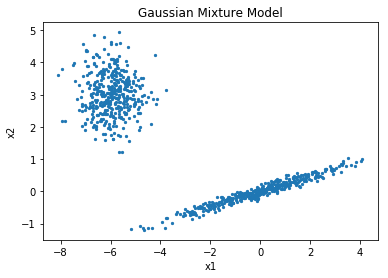

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn

n_samples = 400

mu1 = np.array([0, 0])
mu2 = np.array([-6, 3])
sigma1 = np.array([[0., -0.1], [1.7, .4]])
sigma2 = np.eye(2)

np.random.seed(0)
X = np.r_[1.0 * np.dot(randn(n_samples, 2), sigma1) + mu1,
          0.7 * np.dot(randn(n_samples, 2), sigma2) + mu2]
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Gaussian Mixture Model")
plt.show()

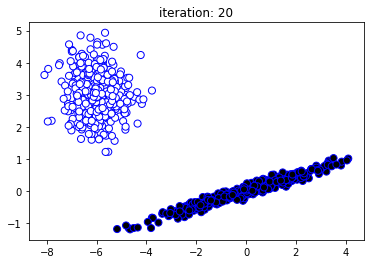

In [18]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=2, max_iter=20) 
model.fit(X)
pi = model.predict_proba(X)
plt.scatter(X[:, 0], X[:, 1], s=50, edgecolors="b", cmap=plt.cm.binary, c=pi[:,0])
plt.title("iteration: 20")
plt.show()

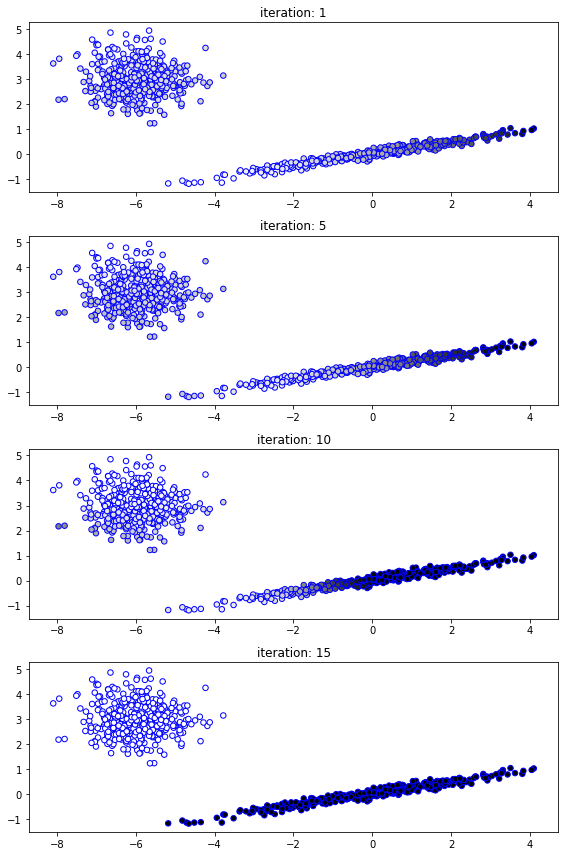

In [19]:
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

def plot_gaussianmixture(n):
    model = GaussianMixture(n_components=2, init_params='random', random_state=0, tol=1e-9, max_iter=n) #  
    with ignore_warnings(category=ConvergenceWarning):
        model.fit(X)
    pi = model.predict_proba(X)
    plt.scatter(X[:, 0], X[:, 1], s=30, linewidth=1, edgecolors="b", cmap=plt.cm.binary, c=pi[:,0])
    plt.title("iteration: {}".format(n))
    

plt.figure(figsize=(8, 12))
plt.subplot(411)
plot_gaussianmixture(1)
plt.subplot(412)
plot_gaussianmixture(5)
plt.subplot(413)
plot_gaussianmixture(10)
plt.subplot(414)
plot_gaussianmixture(15)
plt.tight_layout()
plt.show()

**[reference]**  
* https://towardsdatascience.com/gaussian-mixture-models-explained-6986aaf5a95